In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

### Find the most recent date in the data set.

Most Recent Date: ('2017-08-23',)
One Year Ago: 2016-08-23

         Date  Precipitation
0  2016-08-23           0.00
1  2016-08-24           0.08
2  2016-08-25           0.08
3  2016-08-26           0.00
4  2016-08-27           0.00
            Precipitation
Date                     
2016-08-23           0.00
2016-08-23            NaN
2016-08-23           1.79
2016-08-23           0.05
2016-08-23           0.15
DateFrame Number of Rows: 2230
            Precipitation
Date                     
2016-08-23           0.00
2016-08-23           1.79
2016-08-23           0.05
2016-08-23           0.15
2016-08-23           0.70
DateFrame Number of Rows: 2021


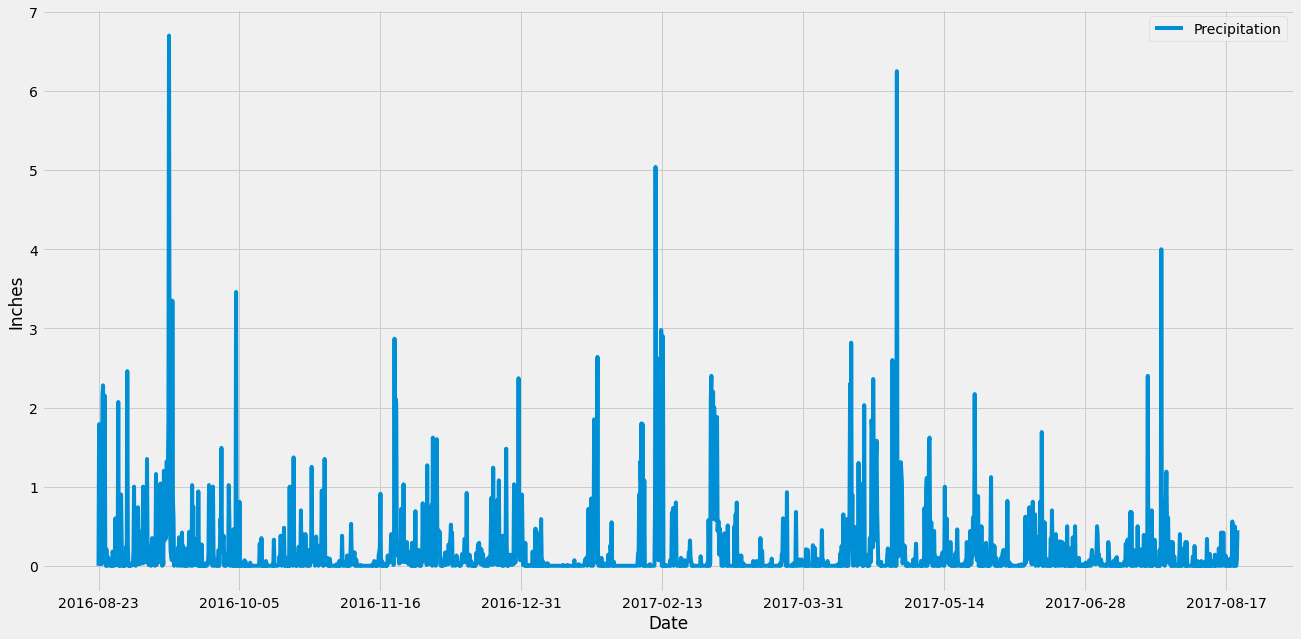

In [51]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f'Most Recent Date: {recent_date}')

# Calculate the date one year from the last date in data set.
start_date = dt.date(2017,8,23)-dt.timedelta(days=365)
print(f'One Year Ago: {start_date}\n')

# Perform a query to retrieve the date and precipitation scores
date_range = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= start_date)

# Save the query results as a Pandas DataFrame and set the index to the date column
date_df = pd.DataFrame(date_range,columns=['Date','Precipitation'])
print(date_df.head())

# Sort the dataframe by date
date_df = date_df.set_index("Date")
date_df = date_df.sort_values("Date")
print(date_df.head())
print(f'DateFrame Number of Rows: {len(date_df)}')

#remove null rows
date_df = date_df.dropna()
print(date_df.head())
print(f'DateFrame Number of Rows: {len(date_df)}')

# Use Pandas Plotting with Matplotlib to plot the data
date_df.plot(figsize=(20,10))
plt.ylabel("Inches")
plt.legend(["Precipitation"])


In [52]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [53]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station).count()
station_count

9

In [54]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations = ((session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station)
            .order_by(func.count(Measurement.station).desc()).all()))
stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [55]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = (session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),
                                     func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all())

most_active_station

[(54.0, 85.0, 71.66378066378067)]

            Temperature
Date                   
2016-08-23         77.0
2016-08-24         77.0
2016-08-25         80.0
2016-08-26         80.0
2016-08-27         75.0
DateFrame Number of Rows: 352
            Temperature
Date                   
2016-08-23         77.0
2016-08-24         77.0
2016-08-25         80.0
2016-08-26         80.0
2016-08-27         75.0
DateFrame Number of Rows: 352


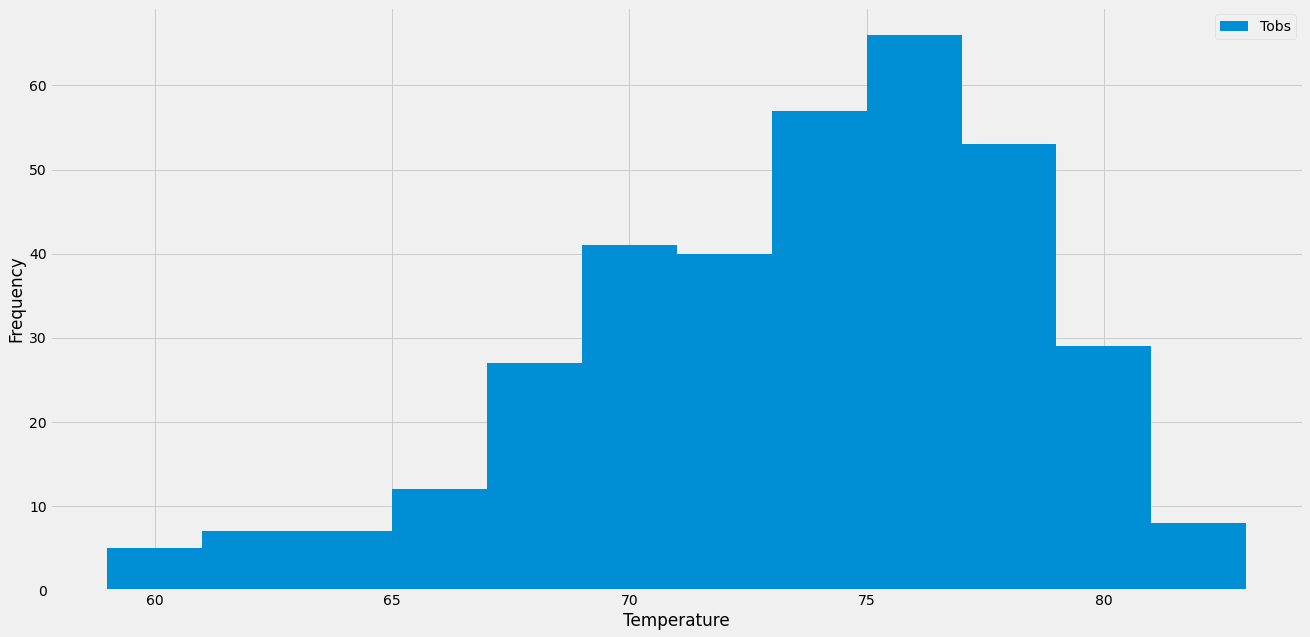

In [56]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_range = (session.query(Measurement.date,Measurement.tobs).filter(Measurement.date >= start_date)
              .filter(Measurement.station == 'USC00519281'))

# Save the query results as a Pandas DataFrame and set the index to the date column
temp_df = pd.DataFrame(temp_range,columns=['Date','Temperature'])

# Sort the dataframe by date
temp_df = temp_df.set_index("Date")
temp_df = temp_df.sort_values("Date")
print(temp_df.head())
print(f'DateFrame Number of Rows: {len(temp_df)}')

#remove null rows
temp_df = temp_df.dropna()
print(temp_df.head())
print(f'DateFrame Number of Rows: {len(temp_df)}')

# Use Pandas Plotting with Matplotlib to plot the data
temp_df.plot.hist(bins=12,figsize=(20,10))
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["Tobs"])


# Close session

In [57]:
# Close Session
session.close()